In [78]:
%pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the Netflix dataset
file_path = 'netflix_titles.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
df.head()


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

descriptions = df['description'].dropna()
df['combined_text'] = df['description'].fillna('') + ' ' + df['listed_in'].fillna('')
combined_texts = df['combined_text'].dropna()

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(combined_texts)


num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)


def print_topics(model, feature_names, num_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topics.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    return topics

feature_names = vectorizer.get_feature_names_out()

topics = print_topics(lda_model, feature_names)

topics


['Topic 1: movies, dramas, international, independent, documentaries, comedies, thrillers, young, family, years',
 'Topic 2: adventure, action, fantasy, fi, sci, movies, international, dramas, anime, war',
 'Topic 3: tv, shows, international, dramas, crime, romantic, series, docuseries, reality, british',
 'Topic 4: documentaries, documentary, music, musicals, movies, life, faith, follows, look, world',
 'Topic 5: tv, comedy, stand, kids, comedies, special, series, friends, world, comedian',
 'Topic 6: movies, international, dramas, thrillers, independent, comedies, horror, woman, young, sports',
 'Topic 7: movies, comedies, international, dramas, family, children, romantic, independent, music, young',
 'Topic 8: movies, comedies, horror, international, thrillers, life, dramas, family, group, romantic',
 'Topic 9: movies, family, children, documentaries, dramas, comedies, young, home, horror, international',
 'Topic 10: movies, dramas, documentaries, international, documentary, life, r

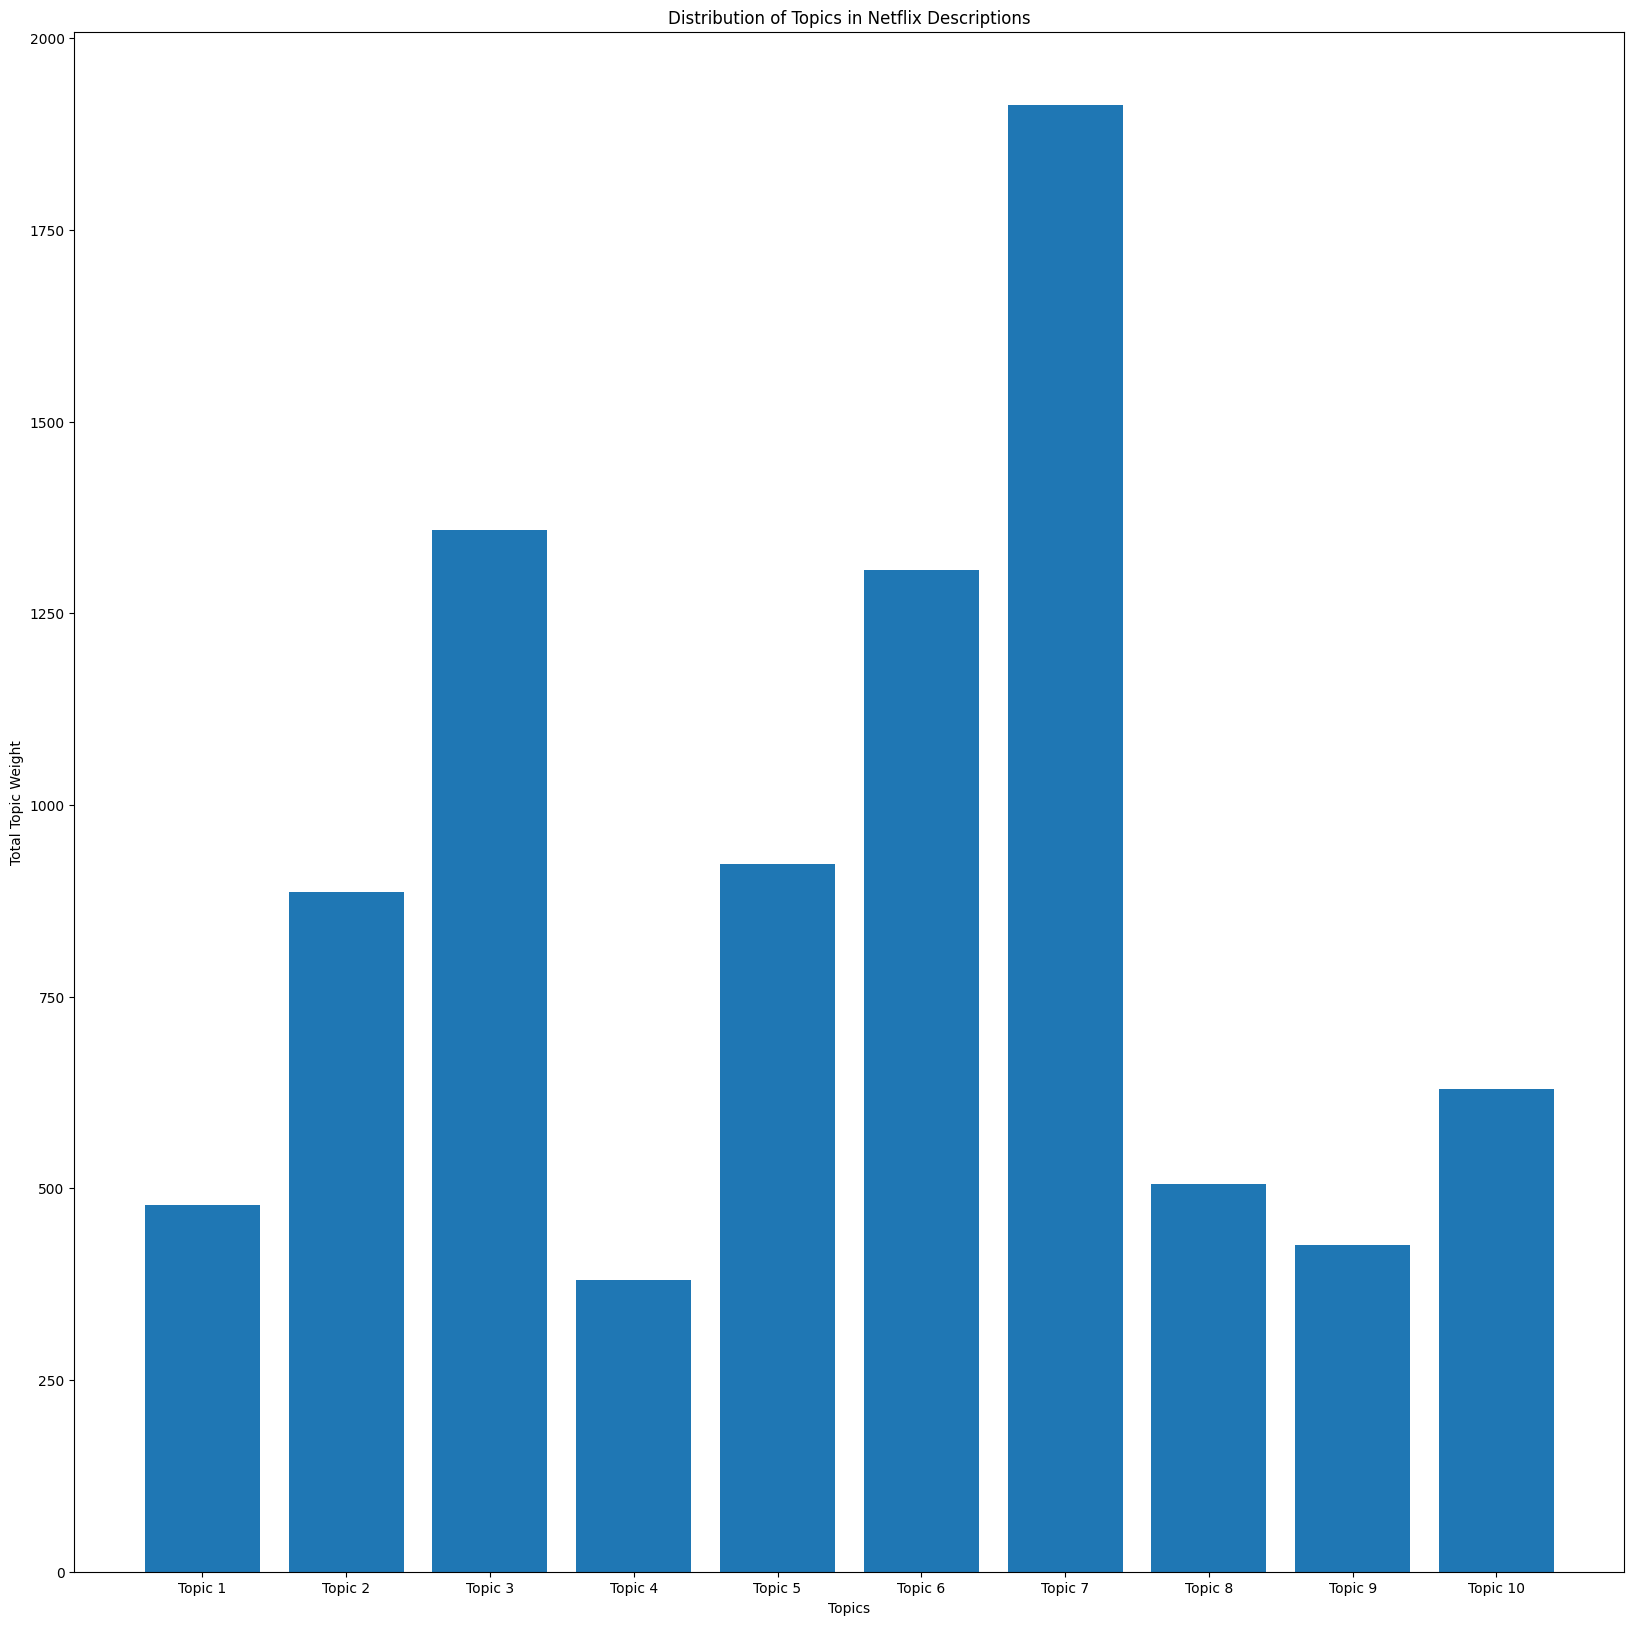

In [80]:
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.lda_model  # Updated import
import numpy as np

lda_vis_data = pyLDAvis.lda_model.prepare(lda_model, doc_term_matrix, vectorizer)  # Updated function

pyLDAvis.save_html(lda_vis_data, 'netflix_lda_visualization.html')  # Updated path

topic_distribution = np.sum(lda_model.transform(doc_term_matrix), axis=0)

plt.figure(figsize=(20, 20))
plt.bar(range(1, len(topic_distribution) + 1), topic_distribution, tick_label=[f'Topic {i}' for i in range(1, len(topic_distribution) + 1)])
plt.title("Distribution of Topics in Netflix Descriptions")
plt.xlabel("Topics")
plt.ylabel("Total Topic Weight")
plt.show()


In [81]:
topic_distributions = lda_model.transform(doc_term_matrix)
df['dominant_topic'] = topic_distributions.argmax(axis=1)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Function for personalized recommendations
def personalized_recommendations(user_input, df, vectorizer, lda_model, top_n=5):
    user_input_processed = user_input.lower()
    user_input_vectorized = vectorizer.transform([user_input_processed])

    user_topic_distribution = lda_model.transform(user_input_vectorized)

    similarities = cosine_similarity(user_topic_distribution, topic_distributions).flatten()

    df['similarity_score'] = similarities

    recommendations = df.sort_values(by='similarity_score', ascending=False).head(top_n)
    return recommendations[['title', 'description', 'dominant_topic', 'similarity_score']]

# Function for topic-based recommendations
def topic_based_recommendations(topic_id, df, top_n=5):
    topic_movies = df[df['dominant_topic'] == topic_id]


    top_movies = topic_movies.head(top_n)
    return top_movies[['title', 'description', 'dominant_topic']]



user_input = "horror"
personalized_results = personalized_recommendations(user_input, df, vectorizer, lda_model, top_n=5)

# Topic-Based Recommendations (e.g., Topic 0)
topic_based_results = topic_based_recommendations(1, df, top_n=5)

personalized_results


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,description,dominant_topic,similarity_score
1848,Half & Half,After two estranged half-sisters in their twen...,7,0.974594
7075,Inequality for All,Former U.S. Labor Secretary Robert Reich makes...,7,0.974163
7643,Oh My Ghost 2,The spirited trio are back to take on a new gh...,7,0.974140
6061,A Thousand Words,When he learns his karma will permit him to sp...,7,0.974027
5795,The White Helmets,As daily airstrikes pound civilian targets in ...,7,0.973869


In [83]:
topic_based_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,description,dominant_topic
2,Ganglands,To protect his family from a powerful drug lor...,1
40,He-Man and the Masters of the Universe,Mighty teen Adam and his heroic squad of misfi...,1
41,Jaws,When an insatiable great white shark terrorize...,1
42,Jaws 2,Four years after the last deadly shark attacks...,1
43,Jaws 3,After the staff of a marine theme park try to ...,1


# BERT

In [67]:
import pandas as pd

file_path = 'netflix_titles.csv'
netflix_data = pd.read_csv(file_path)


netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [68]:
# Select relevant columns and handle missing values
netflix_data = netflix_data[['title', 'description', 'listed_in']]
netflix_data['description'] = netflix_data['description'].fillna('')
netflix_data['listed_in'] = netflix_data['listed_in'].fillna('')

# Combine description and listed_in into a single text field for embedding
netflix_data['text'] = netflix_data['description'] + " " + netflix_data['listed_in']

# Check for any remaining missing values and preview the processed dataset
netflix_data.isnull().sum(), netflix_data.head()


<ipython-input-68-f550a04a2cda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['description'] = netflix_data['description'].fillna('')
<ipython-input-68-f550a04a2cda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['listed_in'] = netflix_data['listed_in'].fillna('')
<ipython-input-68-f550a04a2cda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

(title          0
 description    0
 listed_in      0
 text           0
 dtype: int64,
                    title                                        description  \
 0   Dick Johnson Is Dead  As her father nears the end of his life, filmm...   
 1          Blood & Water  After crossing paths at a party, a Cape Town t...   
 2              Ganglands  To protect his family from a powerful drug lor...   
 3  Jailbirds New Orleans  Feuds, flirtations and toilet talk go down amo...   
 4           Kota Factory  In a city of coaching centers known to train I...   
 
                                            listed_in  \
 0                                      Documentaries   
 1    International TV Shows, TV Dramas, TV Mysteries   
 2  Crime TV Shows, International TV Shows, TV Act...   
 3                             Docuseries, Reality TV   
 4  International TV Shows, Romantic TV Shows, TV ...   
 
                                                 text  
 0  As her father nears the end

In [69]:
pip install sentence-transformers

In [70]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')


netflix_data['embedding'] = netflix_data['text'].apply(lambda x: model.encode(x, convert_to_tensor=True))


embeddings = list(netflix_data['embedding'])

netflix_data[['title', 'text', 'embedding']].head(1)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,title,text,embedding
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...","[tensor(-0.0868), tensor(-0.0854), tensor(-0.0..."


In [84]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_movies(user_query, model, netflix_data):
    # Embed the user's query
    query_embedding = model.encode(user_query, convert_to_tensor=True)

    # Compute cosine similarities between the query and all dataset embeddings
    similarities = [
        cosine_similarity(query_embedding.cpu().numpy().reshape(1, -1), embedding.cpu().numpy().reshape(1, -1))[0][0]
        for embedding in netflix_data['embedding']
    ]

    # Add similarities to the dataframe for ranking
    netflix_data['similarity'] = similarities

    # Sort movies by similarity in descending order
    recommendations = netflix_data.sort_values(by='similarity', ascending=False).head(5)

    return recommendations[['title', 'description', 'listed_in', 'similarity']]




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
user_query = "triller action with horror"
top_movies = recommend_movies(user_query, model, netflix_data)

# Display the recommendations
top_movies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,description,listed_in,similarity
6804,Friday the 13th,A group of teenage camp counselors raises the ...,Horror Movies,0.497463
4538,Truth or Dare,"A game of ""Truth or Dare"" among college friend...",Horror Movies,0.487216
4374,Sabrina,A toy manufacturer and his wife are terrorized...,"Horror Movies, International Movies",0.461050
8276,The Devil Inside,"At once spooky and grisly, this thriller follo...","Horror Movies, Thrillers",0.459275
8613,Train to Busan,"As a zombie outbreak sweeps the country, a dad...","Action & Adventure, Horror Movies, Internation...",0.458336
